#Classification using Support Vector Machine
Please do not import any other python library except numpy and matplotlib 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#import necessary libraries

In [4]:
# np.random.rand() generates random number
# data = [[np.random.rand(), np.random.rand()] for i in range(10)]
# data             array of random numbers
# 2 Dimensional data

#Generating Random linearly separable data


In [12]:
data_new = [[np.random.rand(), np.random.rand()] for i in range(10)]
data=[]
for i, point in enumerate(data_new):
    x, y = point
    if 0.5*x - y + 0.25 > 0:        #separating hyperplane
        data_new[i].append(1)
        data.append(data_new[i])
    elif 0.5*x - y + 0.25 < 0:
        data_new[i].append(-1)
        data.append(data_new[i])
#Here labels are assigned to the data entries see the data below
data
#So the data is a list of lists 
#Each list contains 2 features of a point and the corresponding label

[[0.024085827971629392, 0.8621403461725737, -1],
 [0.9790456345966975, 0.9761560802666334, -1],
 [0.2398930697917121, 0.9610530044130835, -1],
 [0.4750639083796856, 0.23984954076920073, 1],
 [0.31827501102242306, 0.2001456083468912, 1],
 [0.7675148148298111, 0.8873244315070384, -1],
 [0.4966505206621439, 0.5644768156978488, -1],
 [0.07823217771054991, 0.9933859125792296, -1],
 [0.5277707513623712, 0.11099090130251765, 1],
 [0.1831368975396882, 0.6383172352418768, -1]]

#Visualizing the above data

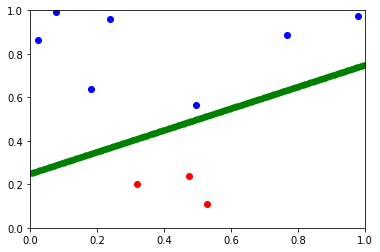

In [14]:
for x, y, l in data:
    if l == 1:        #if label equals 1 color red
        clr = 'red'
    else: 
        clr = 'blue'  #if label equals -1 color blue
    plt.scatter(x, y, c=clr)                 #Scatter the points
    plt.xlim(0,1)
    plt.ylim(0,1)
    
x1 = np.linspace(0, 1, num=400)       #Equally spaced points on the X-axis
y1 = 0.5*x1+0.25                      #Equation of the line to be plotted
plt.scatter(x1, y1, c='green',linewidth=0)    #Scatter the points on the line 
 

#SVM Classifier
Train a SVM classifier using gradient descent and return a Weight Matrix which is a numpy array of length (N + 1) where N is dimension of training samples. 
You can refer to Fig. 1 in [this](https://www.cs.huji.ac.il/~shais/papers/ShalevSiSrCo10.pdf) paper for implementation. You can add arguments to svm_function according to your implementation.

In [16]:
def svm_function(x, y, epoch, l_rate,reg_param): #regularization parameter added to arguments
    
    w=np.zeros(x.shape[1])                #While the first index of x.shape gives the number of training samples the second index tells us the dimension of each of the feature 
    b=0
    N=len(x)                    #The total number of training samples
    #So the SVM goes as follows:
    #At each iteration choose a single training sample at random
    #Estimate the gradient of the objective function with respect to the weights and the bias
    #Use gradient descent to go in opposite direction of the gradient to arrive at a solution 
    #After sufficient number of epochs, and then plot the decision boundary
    for i in range(epoch):
        l_rate=1/(reg_param*(i+1))
        k=np.random.randint(0,N)               #choose a training sample randomly
        (x1,y1)=(x[k],y[k])                    #The features and the labels of the kth chosen training sample
        if(y1*(np.dot(w,x1)+b)<1):             #misclassification!!!!!!
            w-=l_rate*(reg_param*(w)-y1*x1)
            b-=l_rate*(-y1)
        else:
            w-=l_rate*reg_param*(w)
    return (w,b)

#Run SVM Classifier

[[ 0.02408583  0.86214035 -1.        ]
 [ 0.97904563  0.97615608 -1.        ]
 [ 0.23989307  0.961053   -1.        ]
 [ 0.47506391  0.23984954  1.        ]
 [ 0.31827501  0.20014561  1.        ]
 [ 0.76751481  0.88732443 -1.        ]
 [ 0.49665052  0.56447682 -1.        ]
 [ 0.07823218  0.99338591 -1.        ]
 [ 0.52777075  0.1109909   1.        ]
 [ 0.1831369   0.63831724 -1.        ]]


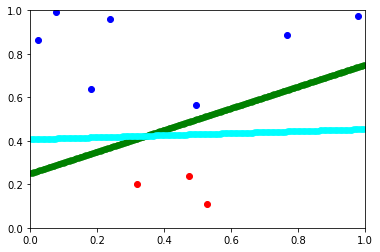

In [17]:

data = np.asarray(data)         #Convert data to numpy array for better utility
print(data)        
X = data[:,:2]                  #The features of the data
# print(X)      The data points X
Y = data[:,2]                   #The labels of the data
# print(Y)      The labels Y
w = svm_function(X, Y, 100000, 0.25,0.01)     
# print(X[0],Y[0])
# print(len(Y))
# k=np.random.randint(0,10)
# (x,y)=(X[k],Y[k])
# print(x,y,k)
# w=np.ones(X.shape[1])
# 10*w
for x, y, l in data:
    if l == 1:        #if label equals 1 color red
        clr = 'red'
    else: 
        clr = 'blue'  #if label equals -1 color blue
    plt.scatter(x, y, c=clr)
    plt.xlim(0,1)
    plt.ylim(0,1)
x1 = np.linspace(0, 1, num=400)         #Again create a linspace to draw lines
y1 = 0.5*x1+0.25                        
plt.scatter(x1, y1, c='green',linewidth=0.1)
x2 = np.linspace(0, 1, num=400)
y2 = ((-w[0][0])/w[0][1])*x1-w[1]/w[0][1]     #The SVM line
plt.scatter(x2, y2, c='cyan',linewidth=0.1)
plt.show()

#Visualize the classifier
Write a code to draw a lines corrosponding to 'w' vector you got as output from svm_function and for a line from which actual data was generated
(0.5*x - y + 0.25). 

In [0]:
    ###################################
    ### Write your code here###########
    ###################################

Increase the number of data-points and observe number of epochs to converge. Draw plots showing data-points, actual data seprating line and line corrosponding to 'w' you got from svm_function for 10, 20, 30, 40, 50 and 100 data-points. Please use only one notebook cell for this visualization. Please use subplot function in matplotlib for this.

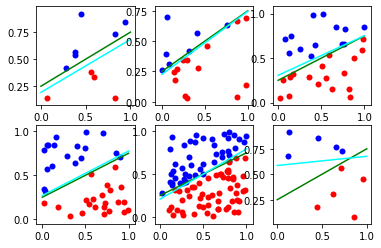

In [19]:
# Increase the number of data points and observe the number of epochs to converge
# generate data with variable number of data points
fig, axs = plt.subplots(2,3)
num_data_points=[10,20,30,40,100,10]
for k in range(6):
    

    # axs[0, 1].plot(x, y, 'tab:orange')
    # axs[0, 1].set_title('Axis [0,1]')
    

    data_new = [[np.random.rand(), np.random.rand()] for i in range(num_data_points[k])]
    data=[]
    for i, point in enumerate(data_new):
        x, y = point
        if 0.5*x - y + 0.25 > 0:        #separating hyperplane
            data_new[i].append(1)
            data.append(data_new[i])
        elif 0.5*x - y + 0.25 < 0:
            data_new[i].append(-1)
            data.append(data_new[i])
    #Here labels are assigned to the data entries


    for x, y, l in data:
        if l == 1:        #if label equals 1 color red
            clr = 'red'
        else: 
            clr = 'blue'  #if label equals -1 color blue
        axs[k//3,k%3].scatter(x,y,color=clr,linewidths=0)
    
    
    data = np.asarray(data)

    X = data[:,:2]
    # print(X)      The data points X
    Y = data[:,2]
    # print(Y)      The labels Y
    w = svm_function(X, Y, 100000, 0.25,0.0001)
    x1 = np.linspace(0, 1, num=400)
    y1 = 0.5*x1+0.25
    axs[k//3,k%3].plot(x1, y1,color='green')
    x2 = np.linspace(0, 1, num=400)
    y2 = ((-w[0][0])/w[0][1])*x1-w[1]/w[0][1]
    axs[k//3,k%3].plot(x2, y2,color='cyan')
plt.show()


#Perturbing the previously created  data
Add noise to the data and visualize the resulting classifier.




In [110]:
for i in range(len(data)):
    data[i][0] += (np.random.rand() - 0.25) / 2.
    data[i][1] += (np.random.rand() - 0.25) / 2.

#Visualizing the perturbed Data and training a soft svm model.

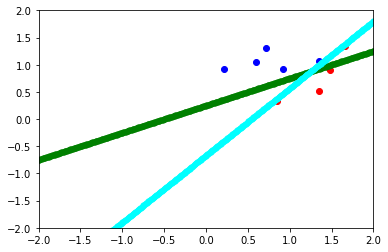

In [111]:


for x, y, l in data:
    if l == 1: 
        clr = 'red'
    else: 
        clr = 'blue'
    plt.scatter(x, y, c=clr)
    plt.xlim(-2,2)
    plt.ylim(-2,2)
x1 = np.linspace(-2, 2, num=400)
y1 = 0.5*x1+0.25
plt.scatter(x1, y1, c='green',linewidth=0.1)

data = np.asarray(data)

X = data[:,:2]

# print(X)      The data points X
Y = data[:,2]
# print(Y)      The labels Y
w = svm_function(X, Y, 100000, 0.25,0.0001)
x2 = np.linspace(-2, 2, num=400)
y2 = ((-w[0][0])/w[0][1])*x1-w[1]/w[0][1]
plt.scatter(x2, y2, c='cyan',linewidth=0.1)
plt.show()

In [112]:
# We can use a SOFT SVM model for noisy data

# Here the parameter slack variable also goes into the objective function
def soft_svm_function(x, y, epoch, l_rate,reg_param,C): #regularization parameter added to arguments
    
    slack_var=np.zeros(len(x))
    w=np.zeros(x.shape[1])
    b=0
    N=len(x)
    #So the SVM goes as follows:
    #At each iteration choose a single training sample at random
    #Estimate the gradient of the objective function with respect to the weights and the bias
    #Use gradient descent to go in opposite direction of the gradient to arrive at a solution 
    #After sufficient number of epochs, and then plot the decision boundary
    for i in range(epoch):
#         l_rate=1/(reg_param*(i+1))
        k=np.random.randint(0,N)
        (x1,y1)=(x[k],y[k])
        if(y1*(np.dot(w,x1)+b)<1-slack_var[k]):       #misclassification!!!!!!
            w-=l_rate*(reg_param*(w)-y1*x1)
            b-=l_rate*(-y1)
            slack_var[k]-=l_rate*(C-1)
        else:
            w-=l_rate*reg_param*(w)
            slack_var[k]-=l_rate*(C)
    return (w,b)

The  allowance of softness in margins (i.e. a low cost setting) allows for errors to be made while fitting the model (support vectors) to the training/discovery data set.    Conversely, hard margins will result in fitting of a model that allows zero errors.    Sometimes it can be helpful to allow for errors in the training set, because it may produce a more generalizable model when applied to new datasets.   Forcing rigid margins can result in a model that performs perfectly in the training set, but is possibly over-fit  / less generalizable when applied to a new dataset.   Identifying the best settings for 'cost' is probably related to the specific data set you are working with.  Currently, there aren't many good solutions for simultaneously optimizing cost, features, and kernel parameters (if using a non-linear kernel).   

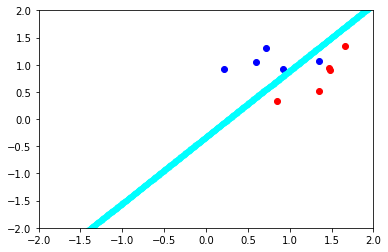

In [113]:
for x, y, l in data:
    if l == 1: 
        clr = 'red'
    else: 
        clr = 'blue'
    plt.scatter(x, y, c=clr)
    plt.xlim(-2,2)
    plt.ylim(-2,2)
x1 = np.linspace(-2, 2, num=400)
y1 = 0.5*x1+0.25
# plt.scatter(x1, y1, c='green',linewidth=0.1)

data = np.asarray(data)

X = data[:,:2]

# print(X)      The data points X
Y = data[:,2]
# print(Y)      The labels Y
w = soft_svm_function(X, Y, 10000, 0.15,0.0001,0.99995)
x2 = np.linspace(-2, 2, num=400)
y2 = ((-w[0][0])/w[0][1])*x1-w[1]/w[0][1]
plt.scatter(x2, y2, c='cyan',linewidth=0.1)
plt.show()

#Visualize the classifier trained on noisy data
Plot actual seperating line and seperating line you got from svm_classifier. Do this for 10, 20, 30, 40, 50 and 100 data points. You can vary the scale of noise as well. Please use only one notebook cell for this visualization. Please use subplot function in matplotlib for this.

#Read the Random Non-linear data stored in CSV1 and visualize it

In [137]:
np.exp(1)

2.718281828459045

Original Data


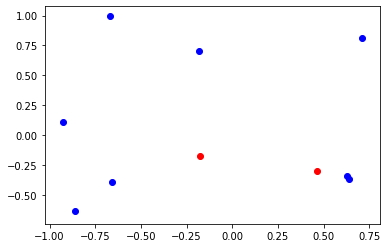

Transformed Data


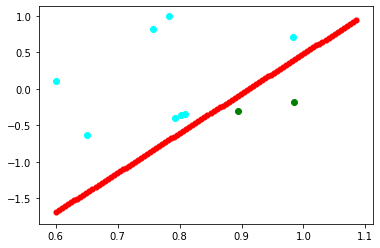

In [406]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Let's read the data
df=pd.read_csv('/home/bhushan/Machine_Learning/Amit_Sethi Assignments/assignment_1/csv1.csv',header=None)


#Let's visualize the data
df = np.asarray(df)
# print(df)
X=df[:,0:2]
y=df[:,2]

print("Original Data")
for i in range(len(y)):
    if y[i] == 1: 
        clr = 'red'
    else: 
        clr = 'blue'
    plt.scatter(X[i,0],X[i,1], c=clr)
plt.show()


    
for i in range(len(y)):
    if y[i] == 1: 
        clr = 'green'
    else: 
        clr = 'cyan'
    plt.scatter(np.cos(X[i,0]),(X[i,1]), c=clr)
#     plt.xlim(np.cos(X[i,0]).min()-1,np.cos(X[i,0]).max()+1)
#     plt.ylim(np.sin(X[i,0]).min()-1,np.sin(X[i,0]).max()+1)

#Thus the data is satisfactorily to be linearly separable
#So transform the data as follows:
print("Transformed Data")
max_x=0
min_x=100
for i in range(len(y)):
    df[i,0:2]=[np.cos(X[i,0]),(X[i,1])]
    if(df[i,0]>max_x):
        max_x=df[i,0]
    if(df[i,0]<min_x):
        min_x=df[i,0]

X = df[:,:2]
# print(X)      The data points X
Y = df[:,2]
# print(Y)      The labels Y
w = svm_function(X, Y, 100000, 0.25,0.0001)
x2 = np.linspace(min_x,max_x+0.1, num=100)
y2 = ((-w[0][0])/w[0][1])*x2-w[1]/w[0][1]
plt.scatter(x2, y2, c='red',linewidth=0.1)
plt.show()


Original Data


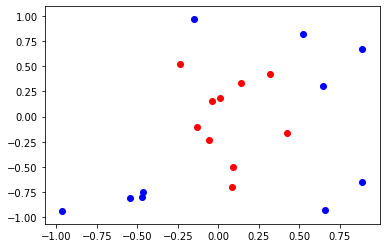

Transformed Data


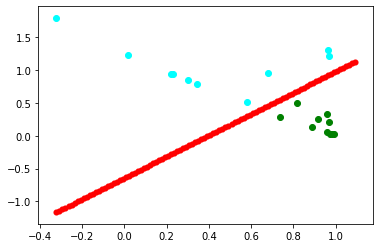

In [405]:



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Let's read the data
df=pd.read_csv('/home/bhushan/Machine_Learning/Amit_Sethi Assignments/assignment_1/csv2.csv',header=None)


#Let's visualize the data
df = np.asarray(df)
X=df[:,0:2]
y=df[:,2]

print("Original Data")
for i in range(len(y)):
    if y[i] == 1: 
        clr = 'red'
    else: 
        clr = 'blue'
    plt.scatter(X[i,0],X[i,1], c=clr)
plt.show()

for i in range(len(y)):
    if y[i] == 1: 
        clr = 'green'
    else: 
        clr = 'cyan'
    plt.scatter(np.cos(X[i,0]+X[i,1]),(X[i,0]**2+X[i,1]**2), c=clr)
print("Transformed Data")    
max_x=0
min_x=100
for i in range(len(y)):
    df[i,0:2]=[np.cos(X[i,0]+X[i,1]),(X[i,0]**2+X[i,1]**2)]
    if(df[i,0]>max_x):
        max_x=df[i,0]
    if(df[i,0]<min_x):
        min_x=df[i,0]
    
# print(df)
X = df[:,:2]
# print(X)      The data points X
Y = df[:,2]
# print(Y)      The labels Y
w = svm_function(X, Y, 100000, 0.25,0.0001)
x2 = np.linspace(min_x,max_x+0.1, num=100)
y2 = ((-w[0][0])/w[0][1])*x2-w[1]/w[0][1]
plt.scatter(x2, y2, c='red',linewidth=0.1)
plt.show()



# for i in range(len(y)):
#     if y[i] == 1: 
#         clr = 'green'
#     else: 
#         clr = 'cyan'
#     plt.scatter(np.cos(X[i,0]),np.exp(X[i,1]), c=clr)



    

Original Data


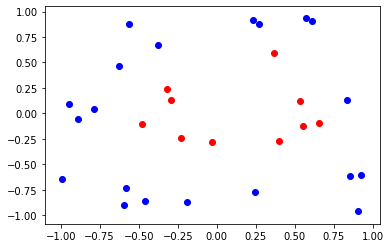

Transformed Data


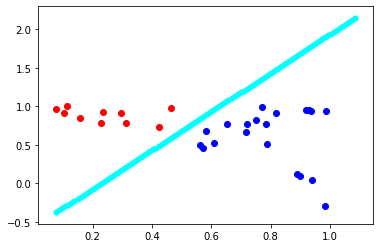

In [403]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Let's read the data
df=pd.read_csv('/home/bhushan/Machine_Learning/Amit_Sethi Assignments/assignment_1/csv3.csv',header=None)


#Let's visualize the data
df = np.asarray(df)
X=df[:,0:2]
y=df[:,2]
print("Original Data")
for i in range(len(y)):
    if y[i] == 1: 
        clr = 'red'
    else: 
        clr = 'blue'
    plt.scatter(X[i,0],X[i,1], c=clr)
plt.show()

# print(X[:,0])
for i in range(len(y)):
    p=np.sin(X[i,0]**2+X[i,1]**2)
    q=np.cos(X[i,0]-X[i,1])
    if y[i] == 1: 
        clr = 'red'
    else: 
        clr = 'blue'
#     plt.scatter(X[i,0],X[i,1], c=clr)
    plt.scatter(p,q, c=clr)

print("Transformed Data")    
max_x=0
min_x=100
for i in range(len(y)):
    df[i,0:2]=[np.sin(X[i,0]**2+X[i,1]**2),np.cos(X[i,0]-X[i,1])]
    if(df[i,0]>max_x):
        max_x=df[i,0]
    if(df[i,0]<min_x):
        min_x=df[i,0]
    
# print(df)
X = df[:,:2]
# print(X)      The data points X
Y = df[:,2]
# print(Y)      The labels Y
w = svm_function(X, Y, 100000, 0.25,0.0001)
x2 = np.linspace(min_x,max_x+0.1, num=100)
y2 = ((-w[0][0])/w[0][1])*x2-w[1]/w[0][1]
plt.scatter(x2, y2, c='cyan',linewidth=0.1)
plt.show()


# for i in range(len(y)):
#     if y[i] == 1: 
#         clr = 'green'
#     else: 
#         clr = 'cyan'
#     plt.scatter(np.cos(X[i,0]),np.exp(X[i,1]), c=clr)

#Train a SVM classifier on the linearly non-separable data by appropriate features crafted from input data
For linearly non-separable data, you need to transform the data in a space where it can be linearly seprable. These features can be exponential, polynomial, trignometric or any other function of actual input features. For example, if your input data is (x1, x2) you can have hand-crafted features as (sin(x1), cos(x1), cos(x2), x1-x2). 
Here you need to think of which hand-crafted features can be best suited for data given to you. Write a function to convert input features to hand-crafted features. Use these features to train a SVM using svm_function.
Note that, if you choose to have L hand-crafted features, SVM will return L+1 dimensional 'w'. 


In [0]:
    ################################################
    ### Write your code here for features###########
    ################################################


    ######################################################
    ### Write your code here for classification###########
    ######################################################


#Visualize decision boundary
Here, as 'w' retuened by svm_function is (L+1) dimensional, you can not visualize it in the form of line in 2D. To visualize non-linear decision boundary in 2D, you can generate few hundred random data-points and can observe if classifier labels them +1 or -1. Then you can plot this points with different colors to get emperical decision boundary. Write the code for visualization of non-linear decision boundary in next cell.

In [0]:
    ###################################
    ### Write your code here###########
    ###################################

#Read the Random Non-linear data stored in CSV2

In [0]:
    ###################################
    ### Write your code here###########
    ###################################

#Train a SVM classifier on the non linear data by appropriate features and also visualise it

In [0]:
    ###################################
    ### Write your code here###########
    ###################################

#Read the Random Non-linear data stored in CSV3

In [0]:
    ###################################
    ### Write your code here###########
    ###################################

#Train a SVM classifier on the non linear data by appropriate Feature Engineering and also visualise it

In [0]:
    ###################################
    ### Write your code here###########
    ###################################